**Detroit Housing Blight Notebook Part 2 :
Modeling**

This notebook will look at the modeling processes associated with the Detroit Blight in Housing Project. 

1. Feature engineering and visualizing dataframe
2. Observing different model outcomes
3. Evaluating Decision Tree model using metrics and visualizations


*Imports and preferred settings*

In [ ]:
# modeling specific imports
from imblearn.over_sampling import SMOTE
from sklearn.datasets import 
import plotly as py
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from numpy.linalg import svd
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [434]:
# general imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import MinMaxScaler
import statsmodels.stats.api as sms
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from itertools import combinations

In [ ]:
%matplotlib notebook

In [435]:
pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 90)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

*functions used in this notebook*

In [399]:
def print_eval_metrics(y_test, y_pred, y, model_name):
    # Calculate Accuracy 
    acc = accuracy_score(y_test,y_pred) * 100
    print("Accuracy is :{0}".format(acc))

    # Calculate F1-Score 
    f1 = f1_score(y_test,y_pred)
    print("F1-Score is :{0}".format(f1))

    # Calculate Precision
    pre = precision_score(y_test,y_pred)
    print("Precision Score is :{0}".format(pre))

    # Calculate Recall
    recall = recall_score(y_test,y_pred)
    print("Recall Score is :{0}".format(recall))

    # Check the AUC for predictions
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("\nAUC is :{0}".format(round(roc_auc,2)))

    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('----------------')
    print_matrix(confusion_matrix(y_test, y_pred), y, model_name)

In [400]:
def print_matrix(cnf_matrix, y, model_name):
    import itertools
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix
    #Add title and Axis Labels
    plt.title(f'cnf matrix of {model_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #Add appropriate Axis Scales
    class_names = set(y) #Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    #Add Labels to Each Cell
    thresh = cnf_matrix.max() / 2. #Used for text coloring below
    #Here we iterate through the confusion matrix and append labels to our visualization.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")

    #Add a Side Bar Legend Showing Colors
    plt.colorbar()
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix

    plt.show()


# Feature engineering and visualizing dataframe

*encode features*

In [59]:
# read in the final dataframe from last notebook
df = pd.read_csv('final_blight_df.csv')
df.drop('PARCELNUM', axis=1,inplace=True) # drop parcelnum, not nesc for analysis

In [100]:
# one hot encode df to get dummy variables for analysis
df_hot = pd.get_dummies(df, drop_first=True)

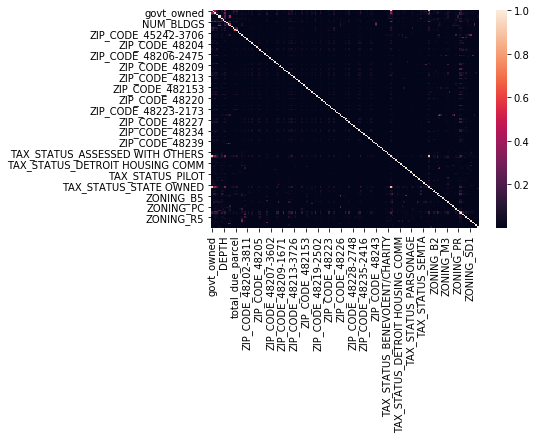

In [122]:
cor = abs(df_hot.corr())
# relevant = cor > 0.5
# relevant.sum()
sns.heatmap(cor);

In [101]:
# drop target variable on X and assign it to y
X = df_hot.drop('total_tickets', axis=1)
X = df_hot['total_tickets'].apply(lambda x: int(x) if x==0 else 1)
# create bianary categories for dep varible - whether or not it has tickets
y = df_hot['total_tickets'].apply(lambda x: int(x) if x==0 else 1)

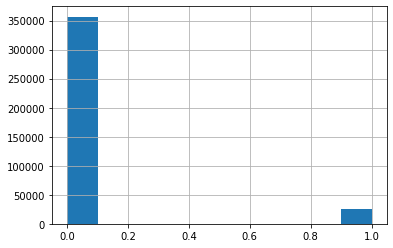

In [175]:
y.hist(); # visualize class imbalance

<IPython.core.display.Javascript object>


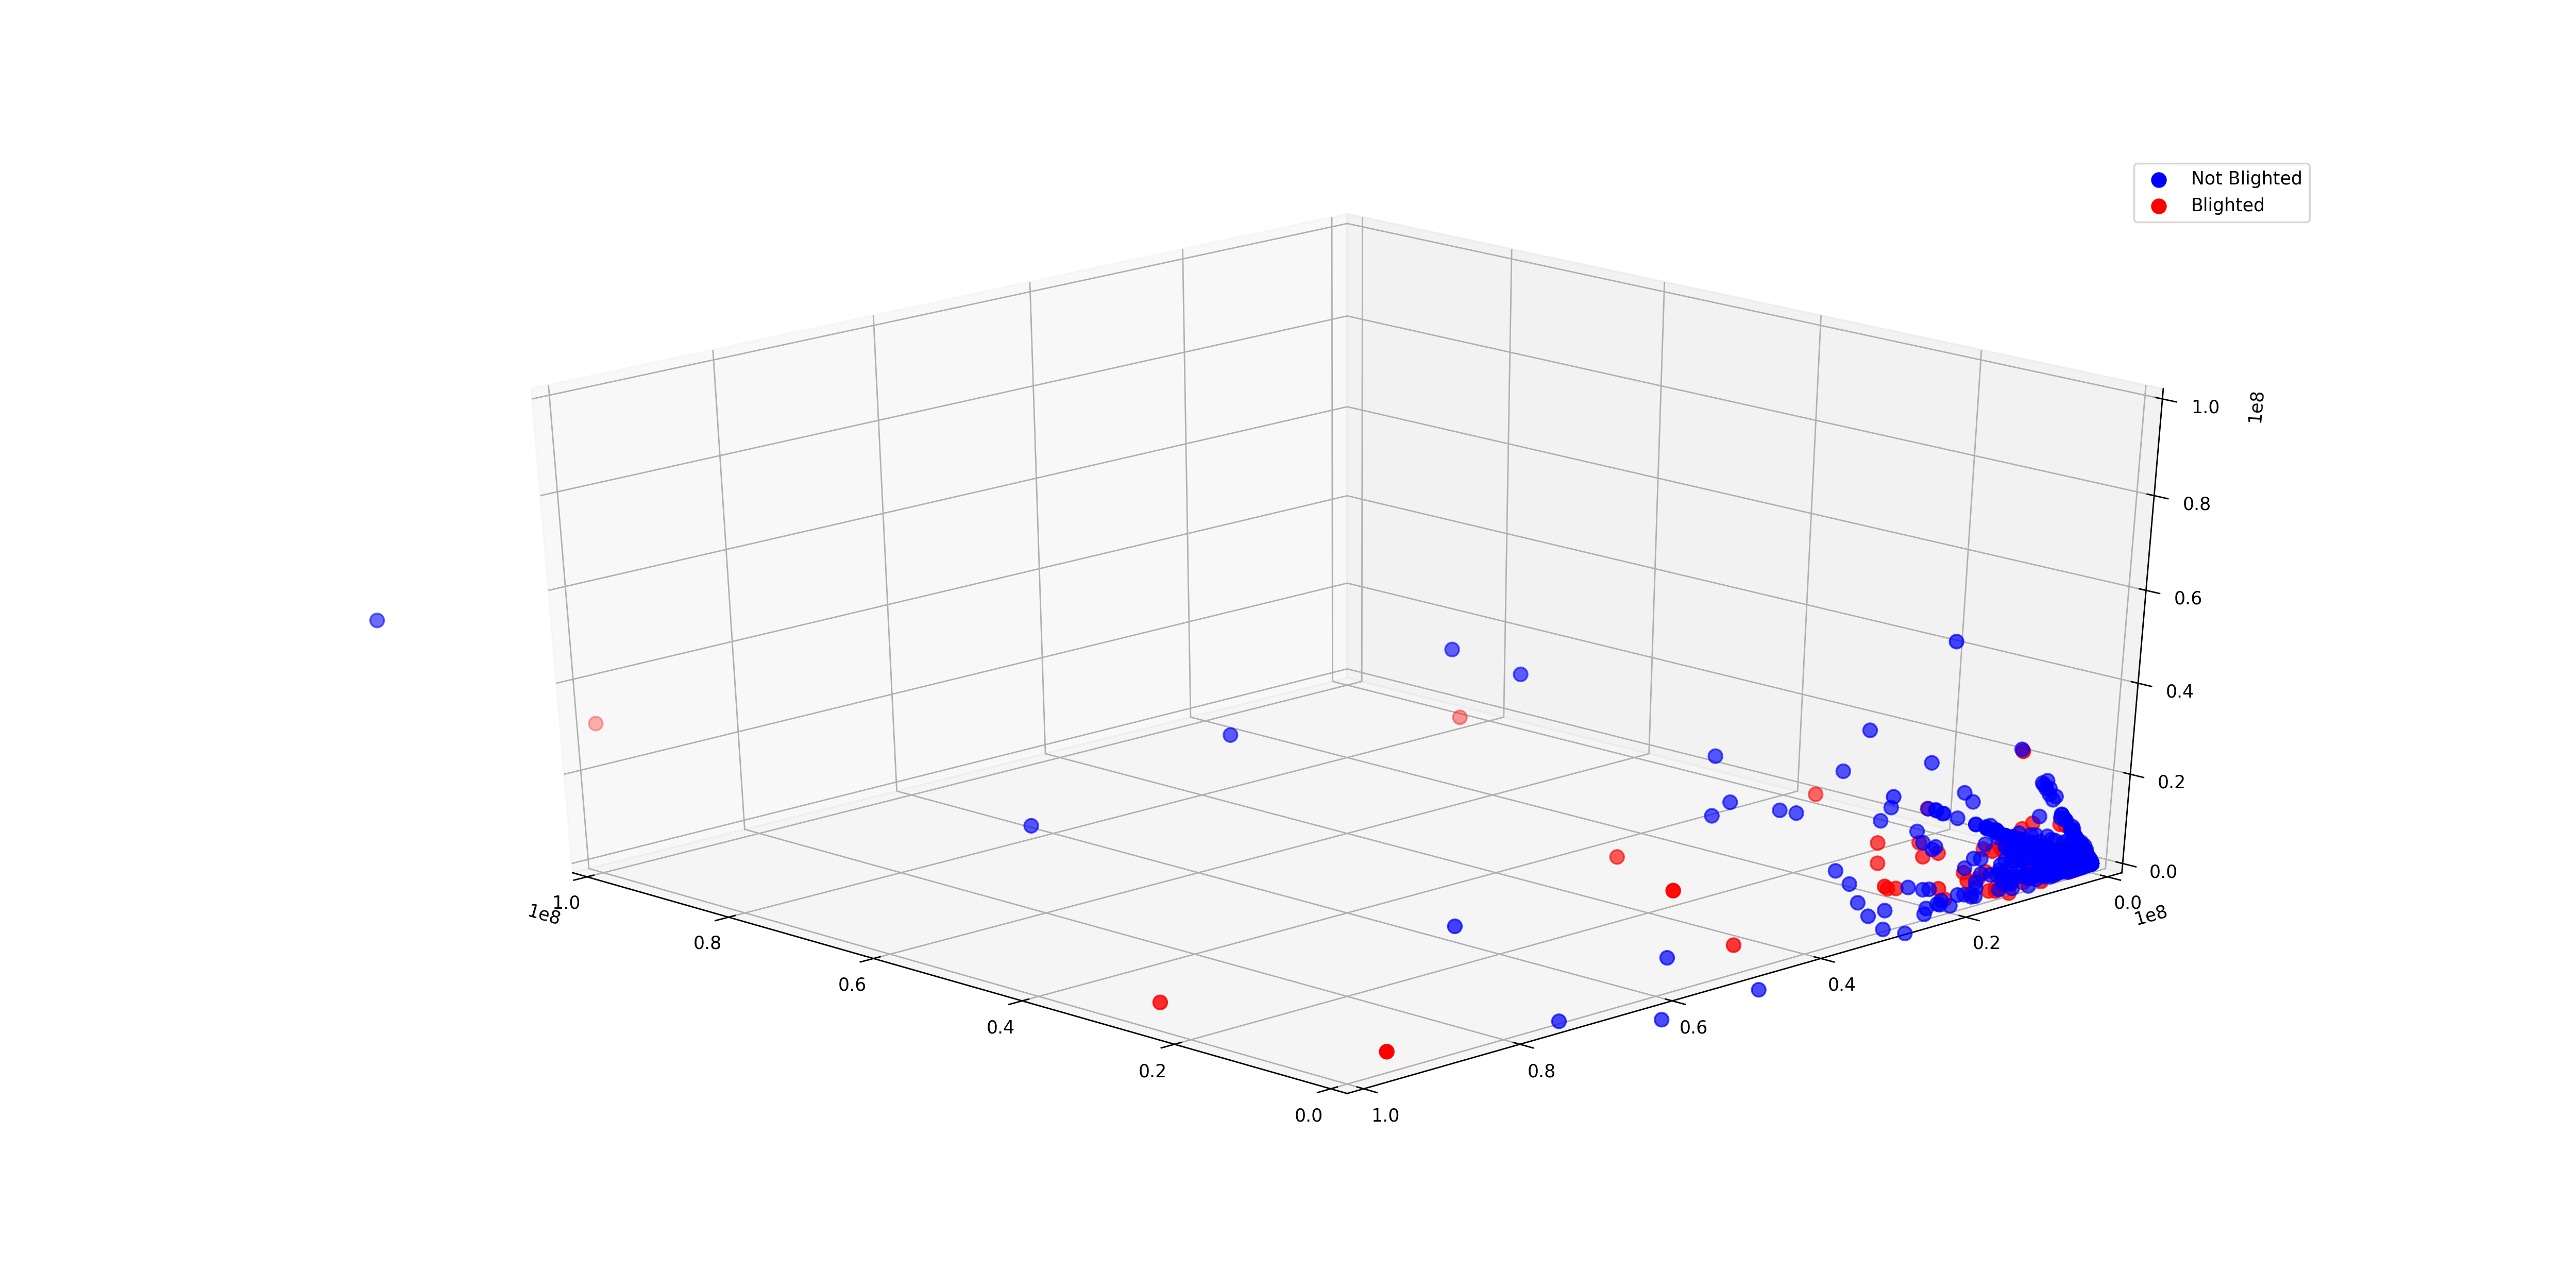

In [322]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s3_x, s3_y, s3_z, c='b', s=(60,60,60), label='Not Blighted')
ax.scatter(ns3_x, ns3_y, ns3_z, c='red', s=(60,60,60), label='Blighted')
ax.set(ylim=(0, 100000000),xlim=(0, 100000000),zlim=(0, 100000000))
ax.view_init(30, 135)
ax.legend()
plt.show()

In [227]:
Xn = np.random.random((5, 8))
Xn.round(2)

Xn.mean(0).round(2)

Xn_0mean = Xn - Xn.mean(0)
Xn_0mean.round(2)

U, s, Vh = svd(Xn_0mean, full_matrices=False)

s.round(2)


(U[:, :]*s[:]).round(2)

array([[-0.49,  0.42,  0.37,  0.1 ,  0.  ],
       [-0.54, -0.54, -0.08, -0.26,  0.  ],
       [ 0.13,  0.57, -0.36, -0.14,  0.  ],
       [ 0.82, -0.17,  0.24, -0.13,  0.  ],
       [ 0.08, -0.28, -0.18,  0.44,  0.  ]])

In [228]:
(U[:, :2]*s[:2]).round(2)


array([[-0.49,  0.42],
       [-0.54, -0.54],
       [ 0.13,  0.57],
       [ 0.82, -0.17],
       [ 0.08, -0.28]])

In [230]:
Xn_0mean.shape

(5, 8)

In [158]:
create_visualization(model,X,y)

0

We see from the above visualizations and EDA that there is a significant class imbalance. We will take this into consderidation moving forward, but first do some modeling on the current dataset to see how it performs

# Observing different model Outcomes

## Decision Tree

Accuracy is :99.90685150250874
F1-Score is :0.9927252720381464
Precision Score is :0.9995691247076204
Recall Score is :0.9859744990892532

AUC is :0.99

Confusion Matrix
----------------


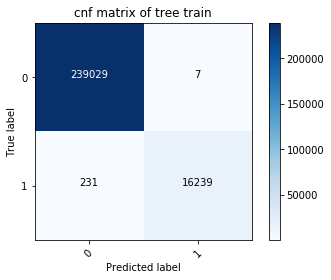

In [432]:
# on training set
print_eval_metrics(y_train, train_predict, y, 'tree train');

Accuracy is :89.82335693341915
F1-Score is :0.24907651715039578
Precision Score is :0.24029867632085078
Recall Score is :0.25851996105160663

AUC is :0.6

Confusion Matrix
----------------


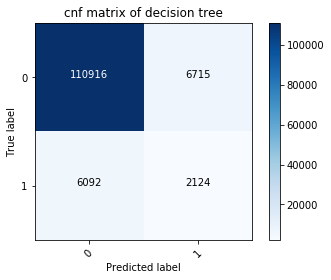

In [433]:
# on test set
print_eval_metrics(y_test, y_pred_tree, y, 'decision tree');

## Random Forest

In [404]:
clf_forest = RandomForestClassifier()

In [ ]:
clf_forest.fit(X_train)

In [405]:
clf_forest.fit(X_train,y_train);

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [406]:
y_forest_pred = clf_forest.predict(X_test)

Accuracy is :96.83186726739612
F1-Score is :0.7027067332786519
Precision Score is :0.9070259865255053
Recall Score is :0.5735150925024343

AUC is :0.78

Confusion Matrix
----------------


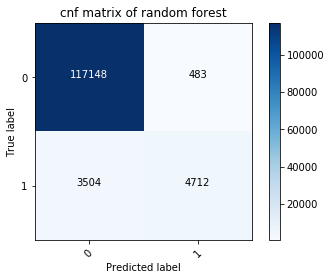

In [407]:
# if score et all for both classes?
print_eval_metrics(y_test, y_forest_pred, y, 'random forest');

We now introduce SMOTE (and ideally upsampling or downsampling) to balance our classes and see if it improves our model

## Applying SMOTE

In [144]:
# should only need this once
# pip install imblearn

  Using cached https://files.pythonhosted.org/packages/e6/62/08c14224a7e242df2cef7b312d2ef821c3931ec9b015ff93bb52ec8a10a3/imbalanced_learn-0.5.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [146]:
# SMOTE data
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [148]:
np.bincount(y_train)

array([239036, 239036])

### SMOTE Decision Tree

In [149]:
clf_tree = DecisionTreeClassifier()

In [150]:
clf_tree.fit(X_train,y_train);

In [152]:
y_pred_tree_smote = clf_tree.predict(X_test)

In [151]:
train_predict_smote = clf_tree.predict(X_train)

*view results*

Accuracy is :99.96339463511772
F1-Score is :0.9996338506152356
Precision Score is :0.9998953585226298
Recall Score is :0.999372479459161

AUC is :1.0

Confusion Matrix
----------------


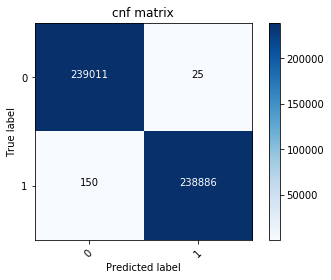

In [153]:
# on training set
print_eval_metrics(y_train, train_predict_smote, y);

Accuracy is :94.59025642248126
F1-Score is :0.5984902099551781
Precision Score is :0.5805491990846682
Recall Score is :0.6175754625121713

AUC is :0.79

Confusion Matrix
----------------


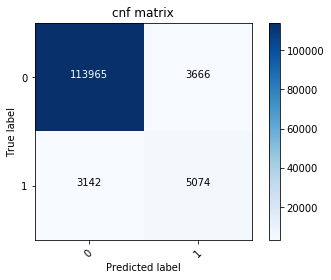

In [154]:
# on test set
print_eval_metrics(y_test, y_pred_tree_smote, y);

### SMOTE Random Forest

In [109]:
clf_forest = RandomForestClassifier()

In [110]:
clf_forest.fit(X_train,y_train);

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

*view results*

In [111]:
y_forest_pred = clf_forest.predict(X_test)

Accuracy is :96.7754495538233
F1-Score is :0.696348398683029
Precision Score is :0.9038461538461539
Recall Score is :0.566333982473223

AUC is :0.78

Confusion Matrix
----------------


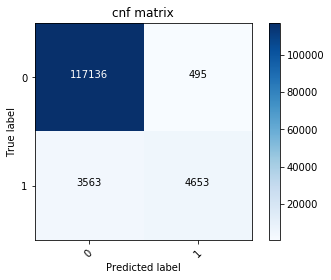

In [112]:
print_eval_metrics(y_test, y_forest_pred, y);

**SMOTE Results:**

In summary, SMOTE was not effective in drastically changing this model's results. Up-/down-sampling is a potential next step, but for time's sake we will move onto analysis and visualization of the currently leading model, Decision Tree

# Evaluating Decision Tree Model

## View incorrectly evaluated observations from decision tree :

In [176]:
listy = []
index_list = []
y_test_index = y_test.reset_index(drop=True)
for i in range(len(y_pred)):
    if y_pred[i] != y_test_index[i]:
        listy.append((i, y_pred[i]))
        index_list.append(i)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [200]:
# look at false positives and false negatives directly
fp = []
fn = []
for z in listy:
    if z[1] == 1:
        fp.append(z[0])
    else:
        fn.append(z[0])

In [202]:
false_positives = X_test.iloc[fp]
false_negatives = X_test.iloc[fn]

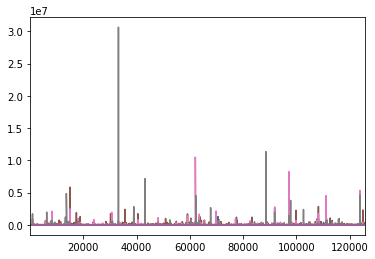

In [211]:
ax = false_negatives.plot(legend=False);

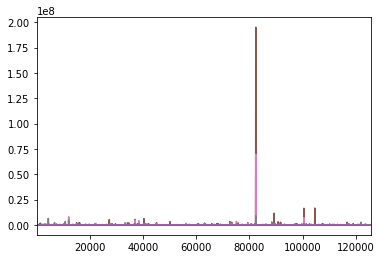

In [212]:
ax = false_positives.plot(legend=);

In [ ]:
# X_test.reset_index(drop=True, inplace=True)
wrongly_classified = X_test.iloc[index_list]

In [197]:
wrongly_classified.describe()

,SQFT,TOTAL_ACRE,FRONTAGE,DEPTH,NUM_BLDGS,SALE_PRICE,TXBL_VAL,LAND_VALUE,foreclosed,rental,total_due_parcel,ZIP_CODE_45242-3706,ZIP_CODE_48200,ZIP_CODE_48201,ZIP_CODE_48201-2774,ZIP_CODE_48202,ZIP_CODE_48202-3811,ZIP_CODE_48203,ZIP_CODE_48203-1050,ZIP_CODE_48204,ZIP_CODE_48204-2654,ZIP_CODE_48204-3107,ZIP_CODE_48204-3687,ZIP_CODE_48205,ZIP_CODE_48206,ZIP_CODE_48206-2012,ZIP_CODE_48206-2323,ZIP_CODE_48206-2475,ZIP_CODE_48207,ZIP_CODE_48207-2718,ZIP_CODE_48207-3602,ZIP_CODE_48207-3734,ZIP_CODE_48207-4965,ZIP_CODE_48207.,ZIP_CODE_48208,ZIP_CODE_48209,ZIP_CODE_48209-1373,ZIP_CODE_48209-1671,ZIP_CODE_48210,ZIP_CODE_48210-1186,ZIP_CODE_48210-3008,ZIP_CODE_48211,ZIP_CODE_48212,ZIP_CODE_48213,ZIP_CODE_48213-3726,...,TAX_STATUS_FEDERAL,TAX_STATUS_HOSPITAL,TAX_STATUS_NON-PROFIT,TAX_STATUS_PA 245,TAX_STATUS_PARSONAGE,TAX_STATUS_PILOT,TAX_STATUS_PROJECTS,TAX_STATUS_PUBLIC LIGHTING,TAX_STATUS_RAILROAD,TAX_STATUS_REAL ESTATE DIVISION,TAX_STATUS_RELIGIOUS,TAX_STATUS_SEMTA,TAX_STATUS_STATE LAND BANK,TAX_STATUS_STATE OWNED,TAX_STATUS_STATUTORY,TAX_STATUS_TAXABLE,TAX_STATUS_WATER DEPARTMENT,ZONING_B1,ZONING_B2,ZONING_B3,ZONING_B4,ZONING_B5,ZONING_B6,ZONING_M1,ZONING_M2,ZONING_M3,ZONING_M4,ZONING_M5,ZONING_P1,ZONING_PC,ZONING_PCA,ZONING_PD,ZONING_PR,ZONING_R1,ZONING_R2,ZONING_R3,ZONING_R4,ZONING_R5,ZONING_R6,ZONING_SD1,ZONING_SD2,ZONING_SD4,ZONING_SD5,ZONING_TM,ZONING_W1
count,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,...,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000,6672.000
mean,10374.838,0.238,48.408,119.351,0.994,92143.534,51895.324,30724.306,0.002,0.116,0.000,0.000,0.001,0.006,0.000,0.022,0.000,0.013,0.000,0.035,0.000,0.000,0.000,0.035,0.046,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.000,0.012,0.040,0.000,0.000,0.053,0.000,0.000,0.012,0.021,0.030,0.000,...,0.000,0.000,0.001,0.000,0.000,0.006,0.000,0.000,0.001,0.000,0.003,0.000,0.000,0.000,0.000,0.954,0.000,0.000,0.018,0.002,0.094,0.003,0.001,0.000,0.006,0.007,0.022,0.001,0.000,0.000,0.001,0.004,0.000,0.506,0.272,0.029,0.001,0.015,0.001,0.000,0.002,0.001,0.000,0.000,0.000
std,58704.309,1.347,55.887,60.028,1.417,2419137.993,904103.547,467112.843,0.044,0.321,0.000,0.000,0.035,0.077,0.000,0.146,0.000,0.112,0.000,0.184,0.000,0.000,0.000,0.183,0.210,0.000,0.000,0.000,0.121,0.000,0.000,0.000,0.000,0.000,0.108,0.197,0.000,0.000,0.224,0.000,0.000,0.107,0.143,0.172,0.000,...,0.000,0.012,0.027,0.000,0.000,0.074,0.000,0.000,0.030,0.017,0.050,0.000,0.021,0.017,0.021,0.209,0.000,0.000,0.133,0.044,0.292,0.055,0.032,0.000,0.079,0.086,0.147,0.035,0.021,0.000,0.037,0.067,0.000,0.500,0.445,0.168,0.032,0.123,0.039,0.021,0.046,0.035,0.021,0.000,0.000
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3964.000,0.091,35.000,103.000,1.000,3600.000,7600.000,713.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000

In [198]:
X_test.describe()

,SQFT,TOTAL_ACRE,FRONTAGE,DEPTH,NUM_BLDGS,SALE_PRICE,TXBL_VAL,LAND_VALUE,foreclosed,rental,total_due_parcel,ZIP_CODE_45242-3706,ZIP_CODE_48200,ZIP_CODE_48201,ZIP_CODE_48201-2774,ZIP_CODE_48202,ZIP_CODE_48202-3811,ZIP_CODE_48203,ZIP_CODE_48203-1050,ZIP_CODE_48204,ZIP_CODE_48204-2654,ZIP_CODE_48204-3107,ZIP_CODE_48204-3687,ZIP_CODE_48205,ZIP_CODE_48206,ZIP_CODE_48206-2012,ZIP_CODE_48206-2323,ZIP_CODE_48206-2475,ZIP_CODE_48207,ZIP_CODE_48207-2718,ZIP_CODE_48207-3602,ZIP_CODE_48207-3734,ZIP_CODE_48207-4965,ZIP_CODE_48207.,ZIP_CODE_48208,ZIP_CODE_48209,ZIP_CODE_48209-1373,ZIP_CODE_48209-1671,ZIP_CODE_48210,ZIP_CODE_48210-1186,ZIP_CODE_48210-3008,ZIP_CODE_48211,ZIP_CODE_48212,ZIP_CODE_48213,ZIP_CODE_48213-3726,...,TAX_STATUS_FEDERAL,TAX_STATUS_HOSPITAL,TAX_STATUS_NON-PROFIT,TAX_STATUS_PA 245,TAX_STATUS_PARSONAGE,TAX_STATUS_PILOT,TAX_STATUS_PROJECTS,TAX_STATUS_PUBLIC LIGHTING,TAX_STATUS_RAILROAD,TAX_STATUS_REAL ESTATE DIVISION,TAX_STATUS_RELIGIOUS,TAX_STATUS_SEMTA,TAX_STATUS_STATE LAND BANK,TAX_STATUS_STATE OWNED,TAX_STATUS_STATUTORY,TAX_STATUS_TAXABLE,TAX_STATUS_WATER DEPARTMENT,ZONING_B1,ZONING_B2,ZONING_B3,ZONING_B4,ZONING_B5,ZONING_B6,ZONING_M1,ZONING_M2,ZONING_M3,ZONING_M4,ZONING_M5,ZONING_P1,ZONING_PC,ZONING_PCA,ZONING_PD,ZONING_PR,ZONING_R1,ZONING_R2,ZONING_R3,ZONING_R4,ZONING_R5,ZONING_R6,ZONING_SD1,ZONING_SD2,ZONING_SD4,ZONING_SD5,ZONING_TM,ZONING_W1
count,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,...,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000,125847.000
mean,6812.185,0.156,41.284,115.733,0.658,39546.872,18713.931,12019.000,0.002,0.033,33.194,0.000,0.002,0.005,0.000,0.016,0.000,0.033,0.000,0.048,0.000,0.000,0.000,0.059,0.026,0.000,0.000,0.000,0.022,0.000,0.000,0.000,0.000,0.000,0.021,0.036,0.000,0.000,0.042,0.000,0.000,0.021,0.029,0.057,0.000,...,0.001,0.000,0.001,0.000,0.000,0.006,0.000,0.000,0.001,0.000,0.009,0.000,0.001,0.003,0.001,0.695,0.000,0.000,0.009,0.001,0.054,0.001,0.001,0.000,0.004,0.005,0.019,0.001,0.001,0.000,0.000,0.006,0.000,0.494,0.346,0.028,0.001,0.011,0.002,0.001,0.002,0.002,0.000,0.000,0.000
std,59882.076,1.376,33.899,81.425,0.771,616843.495,508376.670,246940.271,0.045,0.178,316.169,0.000,0.041,0.068,0.003,0.126,0.003,0.179,0.003,0.213,0.000,0.003,0.003,0.236,0.160,0.000,0.000,0.000,0.147,0.000,0.000,0.003,0.000,0.000,0.144,0.187,0.003,0.000,0.200,0.000,0.000,0.144,0.169,0.232,0.003,...,0.028,0.018,0.023,0.000,0.008,0.075,0.007,0.004,0.029,0.014,0.095,0.000,0.028,0.051,0.031,0.460,0.019,0.015,0.096,0.035,0.227,0.037,0.028,0.000,0.060,0.067,0.137,0.026,0.023,0.009,0.017,0.077,0.011,0.500,0.476,0.165,0.038,0.103,0.049,0.023,0.042,0.040,0.009,0.012,0.003
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

## Look at feature importance

In [214]:
xcol = np.array(X.columns)
feature_importance = pd.DataFrame(np.array(clf_tree.feature_importances_),columns=['importance'])
feature_importance['feature'] = xcol

In [218]:
feature_importance.head()

,importance,feature
0,0.016,govt_owned
1,0.176,detroit_owner
2,0.042,athome_owner
3,0.001,sold
4,0.006,SQFT


In [220]:
# sort and take the top 5 and explore
feature_importance.sort_values('importance', ascending=False).head()

,importance,feature
14,0.534,total_due_parcel
1,0.176,detroit_owner
13,0.056,rental
2,0.042,athome_owner
10,0.017,TXBL_VAL


BEWARE

[Text(222.27985976990055, 215.628, 'X[14] <= 1.5\nentropy = 0.121\nsamples = 255506\nvalue = [239036, 16470]'),
 Text(222.24194071566538, 212.004, 'X[13] <= 0.5\nentropy = 0.061\nsamples = 246741\nvalue = [239036, 7705]'),
 Text(116.81841030955978, 208.38, 'X[1] <= 0.5\nentropy = 0.05\nsamples = 239890\nvalue = [233697, 6193]'),
 Text(48.439709885815915, 204.756, 'X[8] <= 0.5\nentropy = 0.122\nsamples = 35948\nvalue = [33601, 2347]'),
 Text(7.5646972905756105, 201.132, 'X[10] <= 150.0\nentropy = 0.05\nsamples = 11301\nvalue = [11012, 289]'),
 Text(4.275174327011856, 197.50799999999998, 'X[11] <= 205024.0\nentropy = 0.008\nsamples = 2290\nvalue = [2281, 9]'),
 Text(4.1620096495287475, 193.884, 'X[28] <= 0.5\nentropy = 0.006\nsamples = 2262\nvalue = [2255, 7]'),
 Text(4.0494374572680645, 190.26, 'X[6] <= 166.5\nentropy = 0.005\nsamples = 2240\nvalue = [2234, 6]'),
 Text(3.93805023545223, 186.636, 'X[81] <= 0.5\nentropy = 0.004\nsamples = 2218\nvalue = [2213, 5]'),
 Text(3.829032954526095

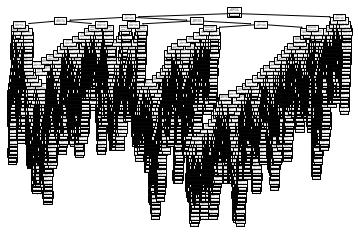

In [114]:
# takes a long time -  change formatting to understand it better
# tree.plot_tree(clf_tree.fit(X_train,y_train))

**Next steps:**

- try SVC to get a different type of classifier
- try grid search to understand what a good max depth would be

##  SVD to visualize data

In [234]:
# train a singular value decomposition
svd = TruncatedSVD()
svd.fit(X)

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
             random_state=None, tol=0.0)

In [268]:
y_0 = list(y.reset_index(drop=True)[y==0].index)
y_1 = np.array(y.reset_index()[y==1].index)

In [275]:
X.iloc[y_1].head()

,govt_owned,detroit_owner,athome_owner,sold,SQFT,TOTAL_ACRE,FRONTAGE,DEPTH,NUM_BLDGS,SALE_PRICE,TXBL_VAL,LAND_VALUE,foreclosed,rental,total_due_parcel,ZIP_CODE_45242-3706,ZIP_CODE_48200,ZIP_CODE_48201,ZIP_CODE_48201-2774,ZIP_CODE_48202,ZIP_CODE_48202-3811,ZIP_CODE_48203,ZIP_CODE_48203-1050,ZIP_CODE_48204,ZIP_CODE_48204-2654,ZIP_CODE_48204-3107,ZIP_CODE_48204-3687,ZIP_CODE_48205,ZIP_CODE_48206,ZIP_CODE_48206-2012,ZIP_CODE_48206-2323,ZIP_CODE_48206-2475,ZIP_CODE_48207,ZIP_CODE_48207-2718,ZIP_CODE_48207-3602,ZIP_CODE_48207-3734,ZIP_CODE_48207-4965,ZIP_CODE_48207.,ZIP_CODE_48208,ZIP_CODE_48209,ZIP_CODE_48209-1373,ZIP_CODE_48209-1671,ZIP_CODE_48210,ZIP_CODE_48210-1186,ZIP_CODE_48210-3008,...,TAX_STATUS_FEDERAL,TAX_STATUS_HOSPITAL,TAX_STATUS_NON-PROFIT,TAX_STATUS_PA 245,TAX_STATUS_PARSONAGE,TAX_STATUS_PILOT,TAX_STATUS_PROJECTS,TAX_STATUS_PUBLIC LIGHTING,TAX_STATUS_RAILROAD,TAX_STATUS_REAL ESTATE DIVISION,TAX_STATUS_RELIGIOUS,TAX_STATUS_SEMTA,TAX_STATUS_STATE LAND BANK,TAX_STATUS_STATE OWNED,TAX_STATUS_STATUTORY,TAX_STATUS_TAXABLE,TAX_STATUS_WATER DEPARTMENT,ZONING_B1,ZONING_B2,ZONING_B3,ZONING_B4,ZONING_B5,ZONING_B6,ZONING_M1,ZONING_M2,ZONING_M3,ZONING_M4,ZONING_M5,ZONING_P1,ZONING_PC,ZONING_PCA,ZONING_PD,ZONING_PR,ZONING_R1,ZONING_R2,ZONING_R3,ZONING_R4,ZONING_R5,ZONING_R6,ZONING_SD1,ZONING_SD2,ZONING_SD4,ZONING_SD5,ZONING_TM,ZONING_W1
17,False,False,False,False,3180.000,0.073,30.000,105.000,0,0,100,280,0,0,2280.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
25,False,True,True,True,3398.000,0.078,34.000,100.000,0,140000,2600,5097,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
46,False,False,False,True,3786.000,0.087,30.000,125.000,1,29000,6000,658,0,0,210.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
72,False,True,False,False,5431.000,0.125,51.000,107.000,1,0,4900,9805,0,0,640.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76,False,True,False,False,6750.000,0.155,68.000,100.000,1,0,38600,11851,0,0,230.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120,False,False,False,True,32190.840,0.739,0.000,0.000,1,60000,51500,51505,0,0,0.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
123,False,False,False,True,3920.000,0.090,35.000,112.000,1,4000,11700,636,0,0,1110.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
129,False,False,False,True,5568.000,0.128,50.000,111.000,1,48888,7100,800,0,0,210.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
135,False,True,True,True,5401.000,0.124,45.000,120.000,1,7300,6400,780,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
213,False,True,False,False,6240.000,0.140,40.000,156.000,0,0,0,2765,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
svd2 = TruncatedSVD(n_components=2, random_state=42)
svd.fit(X)

In [277]:
svd = TruncatedSVD(n_components=3, random_state=42)
svd.fit(X)

svd_lems = svd.transform(X)

In [280]:
svd_lems = pd.DataFrame(svd_lems)

In [291]:
not_blighted_3d = svd_lems.iloc[y_0]
s3_x = not_blighted_3d[0]
s3_y = not_blighted_3d[1]
s3_z = not_blighted_3d[2]

blighted_3d = svd_lems.iloc[y_1]
ns3_x = blighted_3d[0]
ns3_y = blighted_3d[1]
ns3_z = blighted_3d[2]

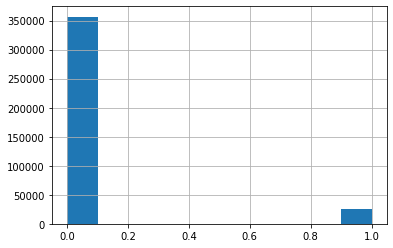

In [412]:
y.hist()

In [318]:
%matplotlib notebook

<IPython.core.display.Javascript object>


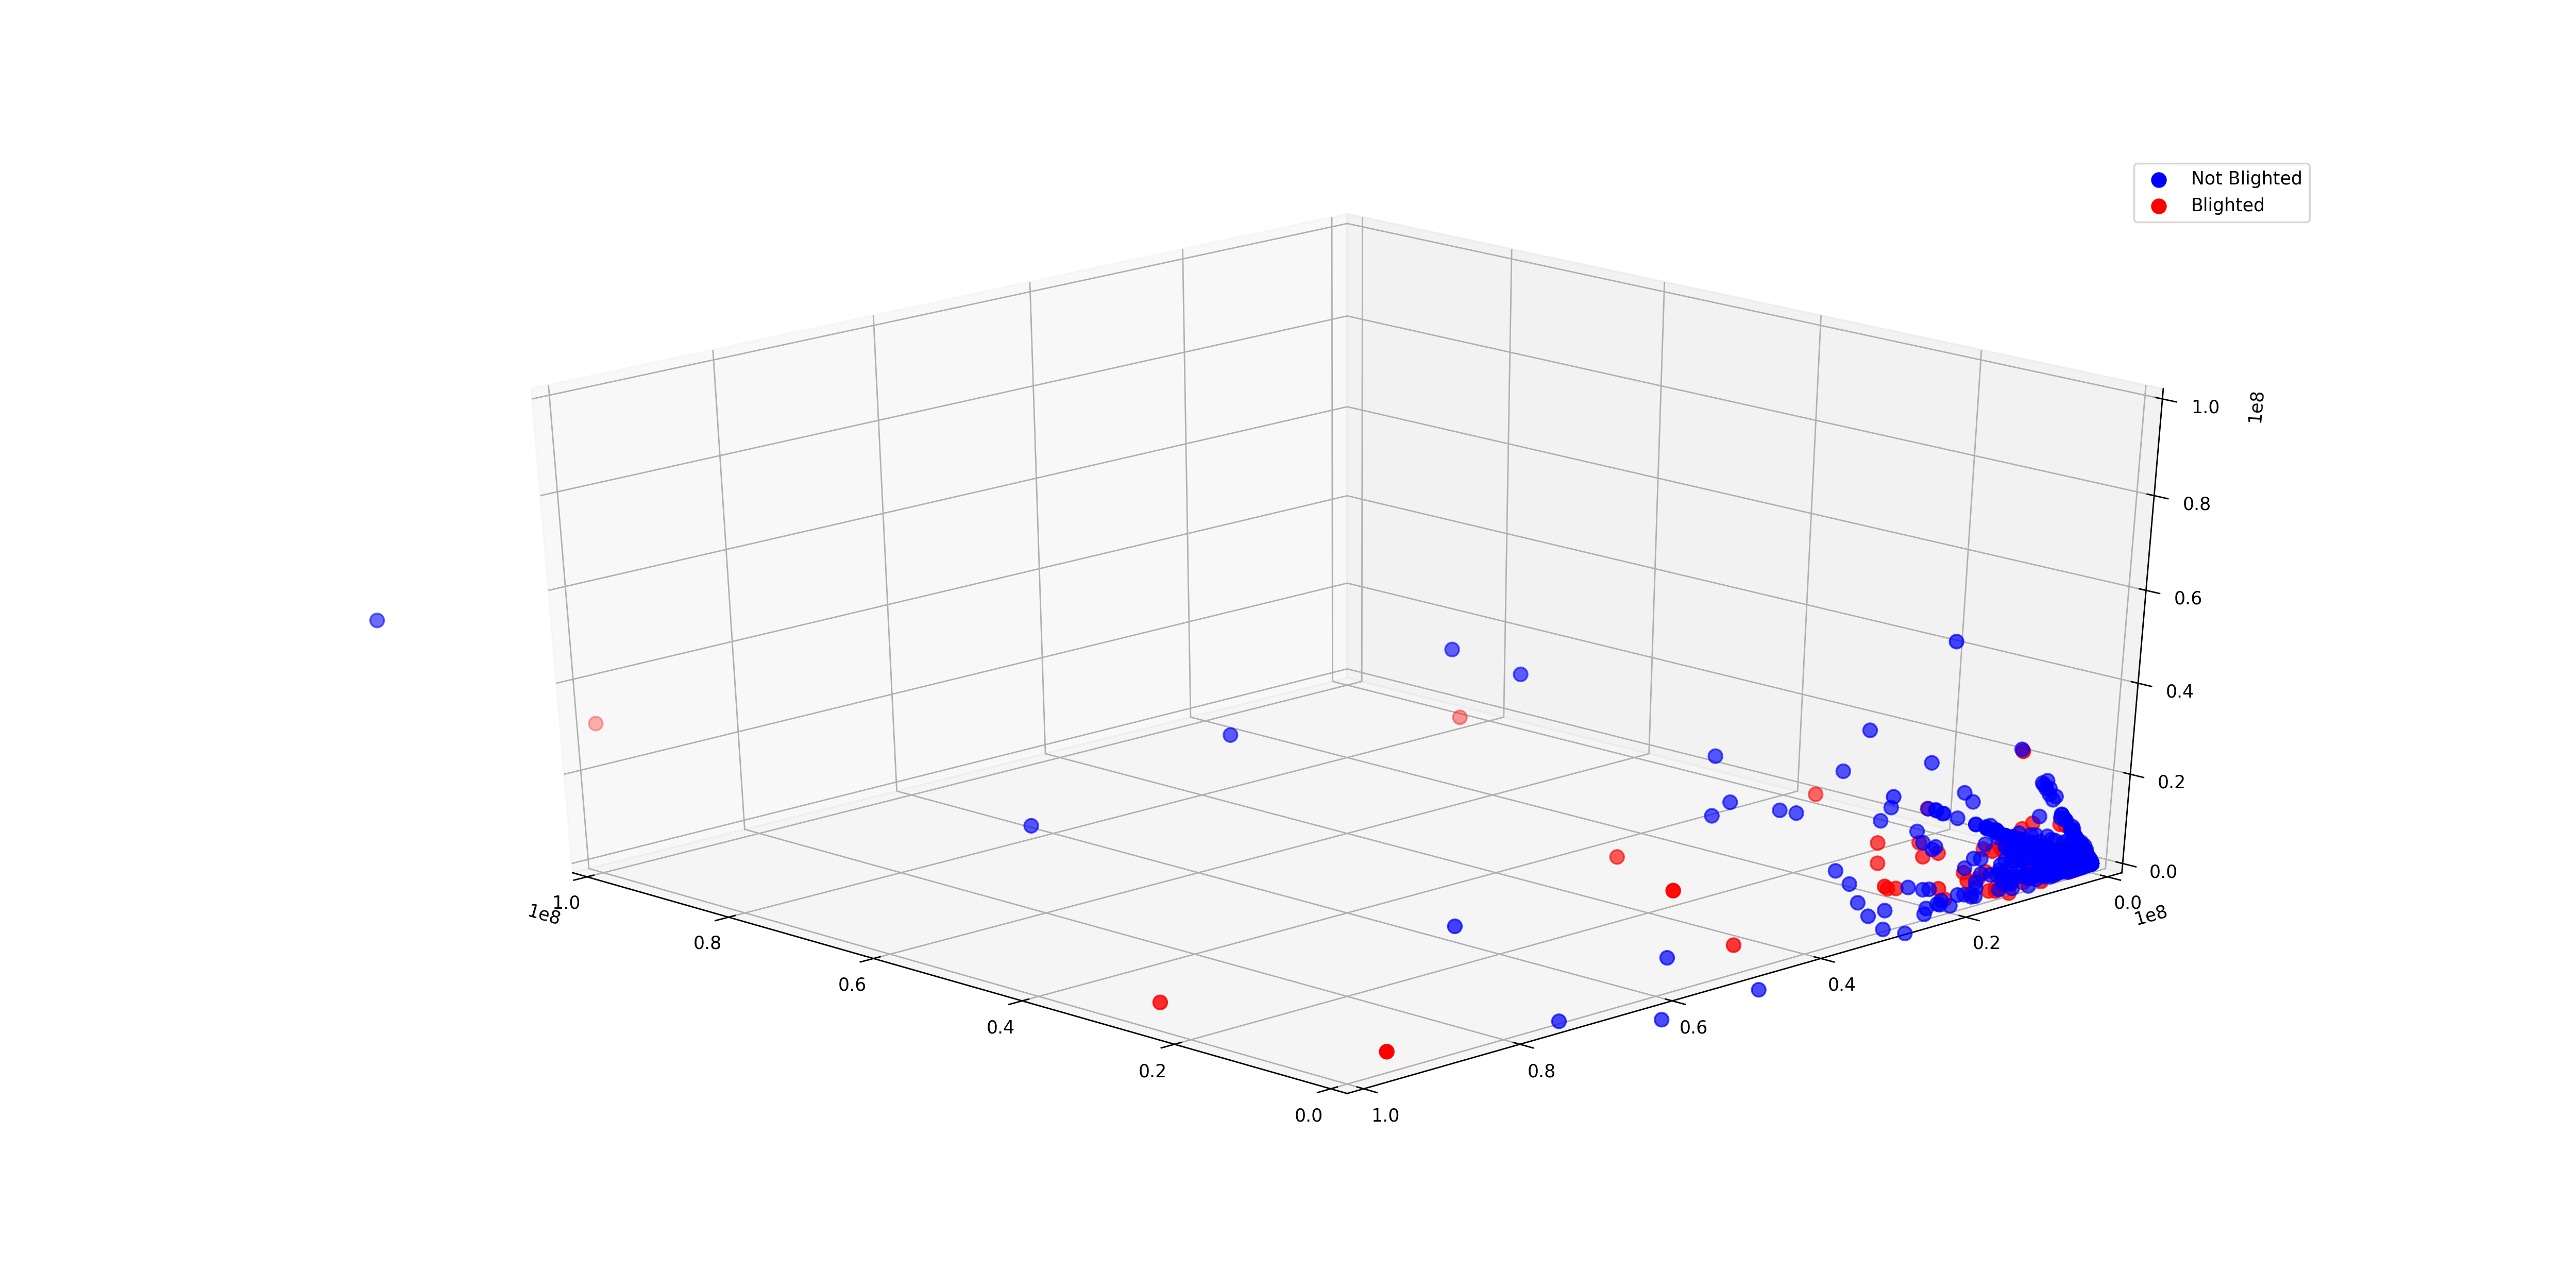

In [322]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s3_x, s3_y, s3_z, c='b', s=(60,60,60), label='Not Blighted')
ax.scatter(ns3_x, ns3_y, ns3_z, c='red', s=(60,60,60), label='Blighted')
ax.set(ylim=(0, 100000000),xlim=(0, 100000000),zlim=(0, 100000000))
ax.view_init(30, 135)
ax.legend()
plt.show()

In [227]:
Xn = np.random.random((5, 8))
Xn.round(2)

Xn.mean(0).round(2)

Xn_0mean = Xn - Xn.mean(0)
Xn_0mean.round(2)

U, s, Vh = svd(Xn_0mean, full_matrices=False)

s.round(2)


(U[:, :]*s[:]).round(2)

array([[-0.49,  0.42,  0.37,  0.1 ,  0.  ],
       [-0.54, -0.54, -0.08, -0.26,  0.  ],
       [ 0.13,  0.57, -0.36, -0.14,  0.  ],
       [ 0.82, -0.17,  0.24, -0.13,  0.  ],
       [ 0.08, -0.28, -0.18,  0.44,  0.  ]])

In [228]:
(U[:, :2]*s[:2]).round(2)


array([[-0.49,  0.42],
       [-0.54, -0.54],
       [ 0.13,  0.57],
       [ 0.82, -0.17],
       [ 0.08, -0.28]])

In [158]:
create_visualization(model,X,y)

0

In [439]:
df.to_csv('df_to_ammend.csv', index=False)